# Bioimaging 2

## 1. Data

#### 1.1. Check working directory.

In [1]:
#Package
import os

#Command
os.getcwd()

'/home/howsetya/workspace/Bioimage2'

There are 4 directories of data, namely 2 sets of training and 2 sets of challenge datasets with the following relative path:
1. ./Images/training_BF-C2DL-HSC/01/subset/*.tif
2. ./Images/training_BF-C2DL-HSC/02/subset/*.tif
3. ./Images/challenge_BF-C2DL-HSC/01/subset/*.tif
4. ./Images/challenge_BF-C2DL-HSC/02/subset/*.tif

These are all subsets of the real complete dataset to save time in going through all the data. Each contains around 20% the amount of the complete data (0.2 * ~1700 = ~350 images).

Additionally, the training 01 dataset is further subset to get even fewer images in the path
./Images/training_BF-C2DL-HSC/01/subset2/*.tif

#### 1.2. Load Images

Make a function to load image files and put them in a data frame.

In [2]:
#Imports
import glob, re
import pandas as pd
from skimage.io import imread, imshow, show

#Function
def load_imgs(path):
    files_img = glob.glob(path)
    files_img.sort()
    df_img = pd.DataFrame(columns=['FileName','Image'])
    for file in files_img:
        filename = re.sub(".*/", "", file[:-4])
        img = imread(file) #tifffile plugin for loading compressed tiffs requires imagecodecs
        df_img.loc[len(df_img)] = [filename,img]
        # print(file) #to show progress
        # imshow(img) #to show image
        # show()
    return(df_img)

In [3]:
#Set path
#This subset2 folder contains even fewer images than the one mentioned above 
path = ('./Images/training_BF-C2DL-HSC/01/subset2/*.tif')

#Load all images in the directory of the path
img_df = load_imgs(path)

#### 1.3. Inspection

In [4]:
#Check the data frame
img_df.shape
img_df.iloc[0:4]

,FileName,Image
0,t0001,"[[132, 132, 131, 133, 132, 131, 133, 134, 132,..."
1,t0040,"[[132, 132, 132, 132, 131, 133, 132, 134, 133,..."
2,t0080,"[[132, 132, 131, 132, 132, 130, 131, 133, 133,..."
3,t0100,"[[131, 133, 133, 131, 132, 131, 131, 131, 132,..."


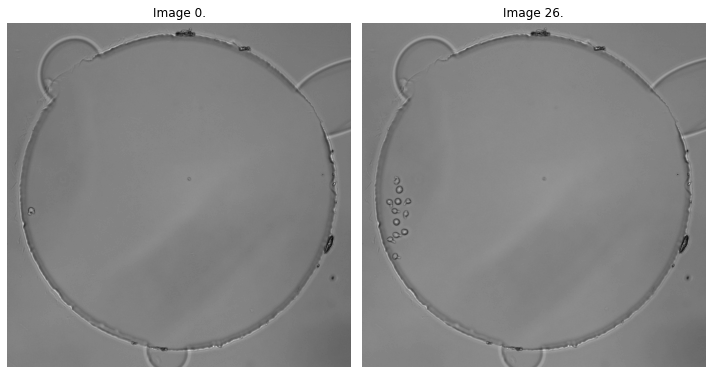

In [5]:
#Imports
import matplotlib.pyplot as plt

#Check the images
n1 = 0 # first image
n2 = 26 # last image
fig, ax = plt.subplots(1,2,figsize=(10,10))
[ax.set_axis_off() for ax in ax.ravel()]
ax[0].imshow(img_df.iloc[n1,1],cmap='gray')
ax[0].set_title(f'Image {n1}.')
ax[1].imshow(img_df.iloc[n2,1],cmap='gray')
ax[1].set_title(f'Image {n2}.')
fig.tight_layout()
plt.show()

## 2. Analysis

#### 2.1. Preliminary Observation

Just to get an idea of how the images of the other sets look like, one arbitrary image is taken from each directory and plotted.

In [6]:
#Load just one arbitrary image from each directory.
tr1_ss = imread('./Images/training_BF-C2DL-HSC/01/subset/t1400.tif')
tr2_ss = imread('./Images/training_BF-C2DL-HSC/02/subset/t1400.tif')
ch1_ss = imread('./Images/challenge_BF-C2DL-HSC/01/subset/t1400.tif')
ch2_ss = imread('./Images/challenge_BF-C2DL-HSC/02/subset/t1400.tif')

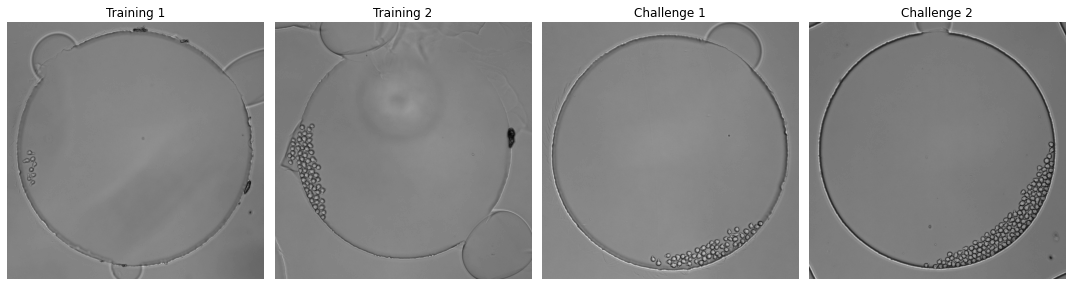

In [7]:
#Check the image
fig, ax = plt.subplots(1,4, figsize=(15,15))
[ax.set_axis_off() for ax in ax.ravel()]
ax[0].imshow(tr1_ss,cmap='gray')
ax[0].set_title('Training 1')
ax[1].imshow(tr2_ss,cmap='gray')
ax[1].set_title('Training 2')
ax[2].imshow(ch1_ss,cmap='gray')
ax[2].set_title('Challenge 1')
ax[3].imshow(ch2_ss,cmap='gray')
ax[3].set_title('Challenge 2')
fig.tight_layout()
plt.show()

As can be seen here, the wells seem to be nicely reasonably rounded except for one dataset (Training2). And glancing intuitively here, the images lack contrast, clearly demonstrated by the dominating grey colour over all the images from the background up to the cells themselves. The histogram also indicate the (assumed) difficulty that would be encountered should a manual thresholding is to be done.

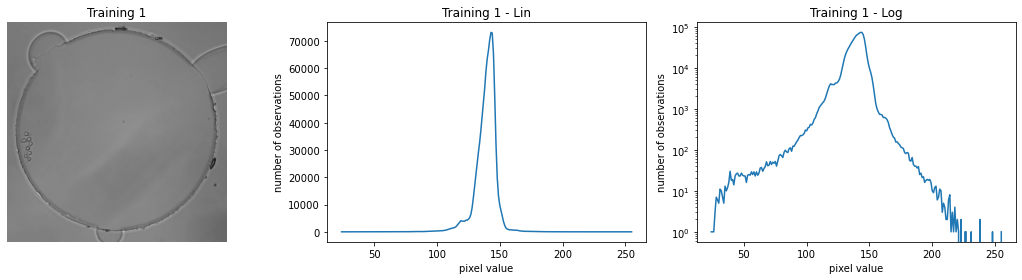

In [8]:
#Imports
from skimage import exposure

hist, hist_centers = exposure.histogram(tr1_ss)

#Plot
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].imshow(tr1_ss,cmap='gray')
ax[0].set_title('Training 1')
ax[0].axis('off')
ax[1].plot(hist_centers, hist)
ax[1].set(xlabel='pixel value', ylabel='number of observations')
ax[1].set_title('Training 1 - Lin')
ax[2].plot(hist_centers, hist)
ax[2].set_yscale('log')
ax[2].set(xlabel='pixel value', ylabel='number of observations')
ax[2].set_title('Training 1 - Log')
fig.tight_layout()
plt.show()

#### 2.2. Thresholding

Thresholding was attempted automatically by using the different methods available in skimage.

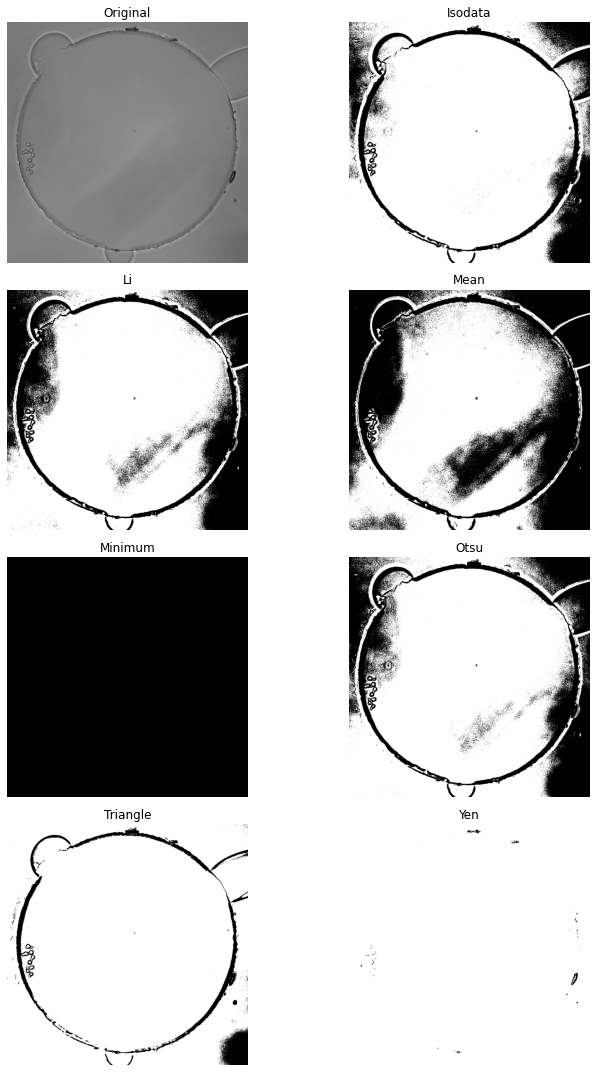

In [9]:
#Imports
from skimage.filters import try_all_threshold

#Plot
fig, ax = try_all_threshold(tr1_ss, figsize=(15, 15), verbose=False)
fig.tight_layout()
plt.show()

The Triangle thresholding method seems promising, at least for the one arbitrary example here.

This is then tried to the small subset that has been loaded before (Training 1 Subset 2). And the result seems fine enough, as seen below.

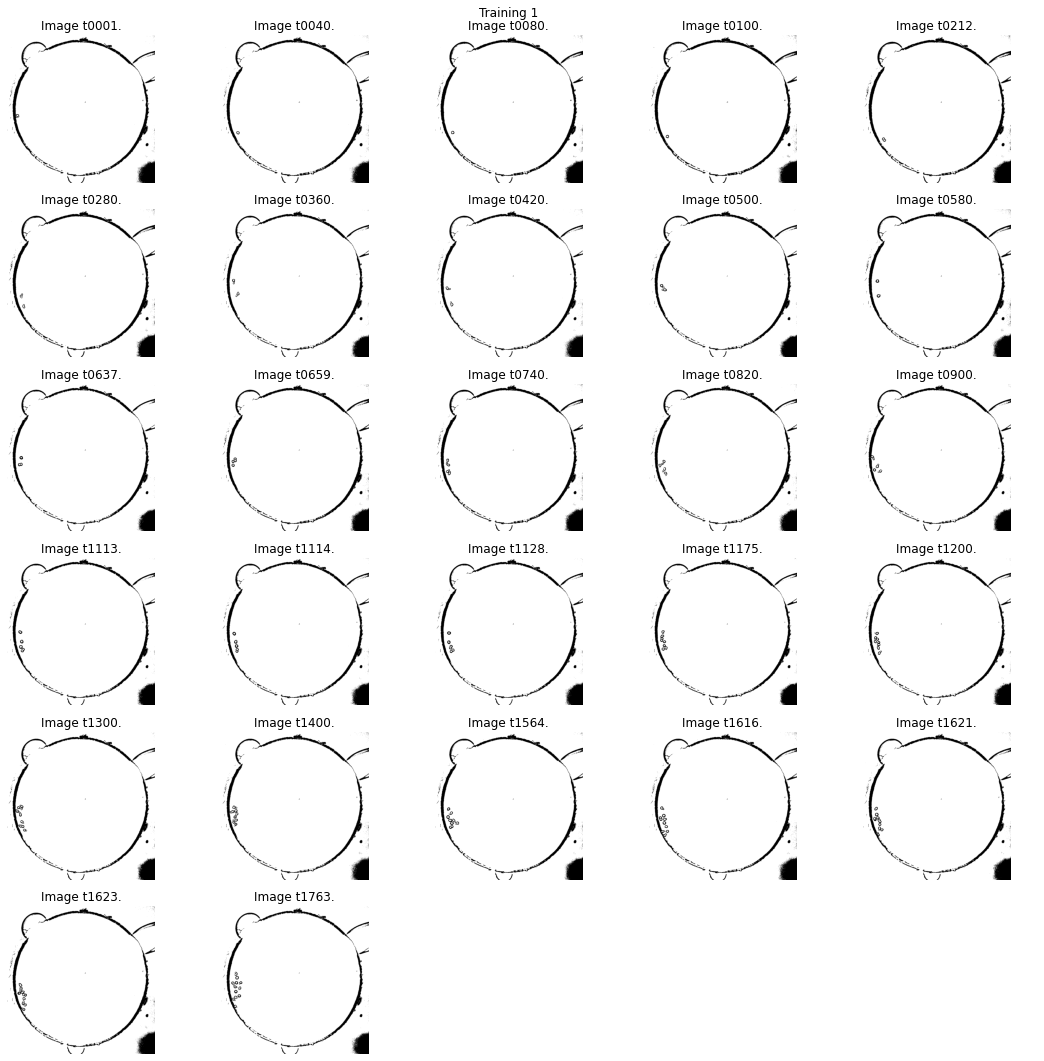

In [10]:
#Imports
from skimage.filters import threshold_triangle as tri

#Overview
fig, ax = plt.subplots(6,5,figsize=(15,15))
fig.suptitle('Training 1')
ax = ax.ravel()
for n in range(len(img_df)):
    thr = tri(img_df.iloc[n,1]) 
    binary_img = img_df.iloc[n,1] > thr
    title = img_df.iloc[n,0]
    ax[n].imshow(binary_img, cmap='gray')
    ax[n].set_title(f'Image {title}.')
[ax.set_axis_off() for ax in ax.ravel()]
fig.tight_layout()

    
#Alternatively, larger images
#for n in range(1,len(img_df),35):
#    thr = tri(img_df.iloc[n,1]) 
#    binary_img = img_df.iloc[n,1] > thr
#    title = img_df.iloc[n,0]
#    fig, ax = plt.subplots(figsize=(8,8))
#    plt.imshow(binary_img, cmap='gray')
#    plt.title(f'Image {title}.')
#    show()

However, running it for other subset proves that the use of the triangle thresholding method seems to be problematic.

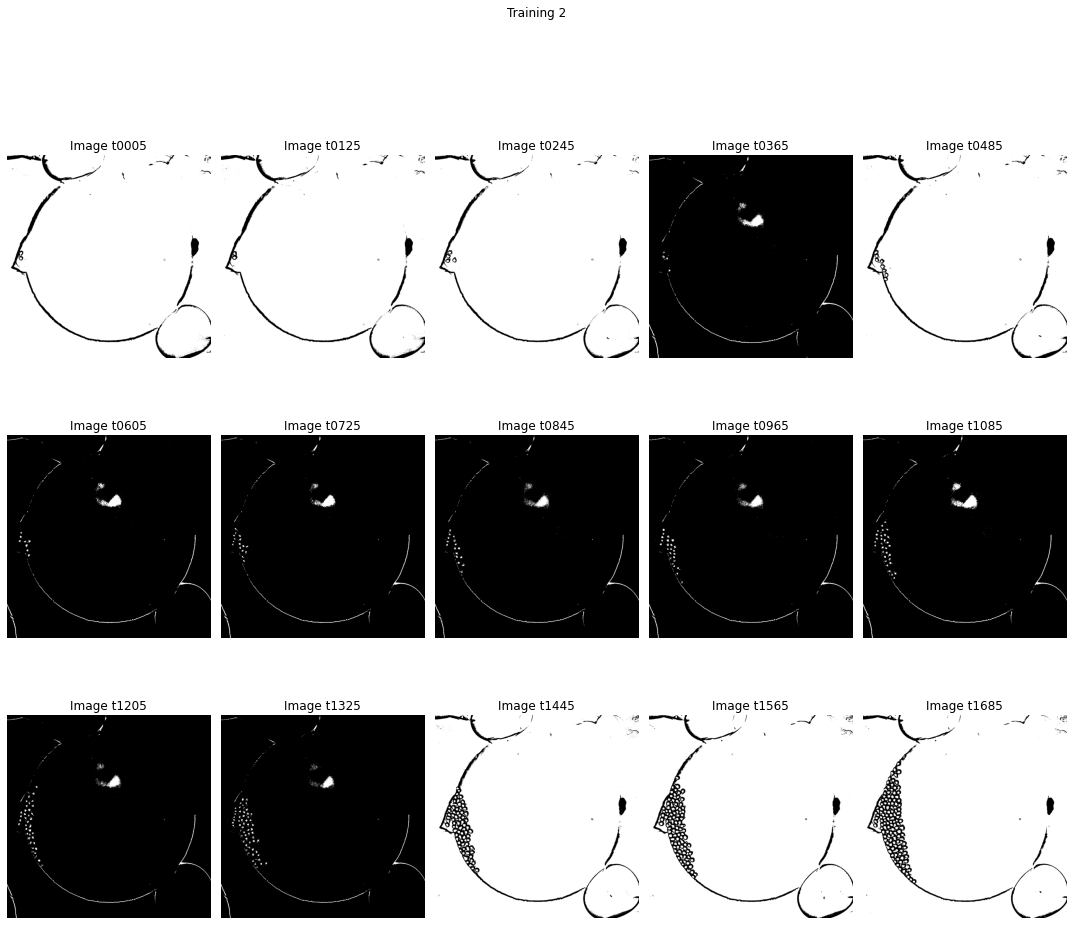

In [11]:
#Try other (sub)dataset, Training 2.
path2 = ('./Images/training_BF-C2DL-HSC/02/subset/*.tif')
img_df2 = load_imgs(path2)

#Overview
fig, ax = plt.subplots(3,5,figsize=(15,15))
fig.suptitle('Training 2')
ax = ax.ravel()
k=0
for n in range(1,len(img_df2),24): #Just sample some images
    thr = tri(img_df2.iloc[n,1]) 
    binary_img = img_df2.iloc[n,1] > thr
    title = img_df2.iloc[n,0]
    ax[k].imshow(binary_img, cmap='gray')
    ax[k].set_title(f'Image {title}')
    ax[k].axis('off')
    k=k+1
    fig.tight_layout()
    
#Alternatively, larger images
#for n in range(1,len(img_df2),12):
#    thr = tri(img_df2.iloc[n,1]) 
#    binary_img = img_df2.iloc[n,1] > thr
#    title = img_df2.iloc[n,0]
#    fig, ax = plt.subplots(figsize=(8,8))
#    plt.imshow(binary_img, cmap='gray')
#    plt.title(f'Image {title}.')
#    show()

The gray level pixel values of some images seem to be "flipped" after thresholding. This problem also persist through the other (sub)datasets. 

Inspecting the difference between the "flipped" image and "non-flipped" image seems that no major difference can be observed. However since the triangle method constructs a line between the histogram peak and the farthest end of the histogram [[1](https://www.kitware.com/histogram-based-thresholding/)][[2](http://www.mif.vu.lt/atpazinimas/dip/FIP/fip-Segmenta.html#Heading118)], it is probable that the line is constructed to the opposite ends of the histogram, depending on the image. On one image it may be directed toward 0, and oppositely on other image, depending on the longest distance to whichever end (zero or max).

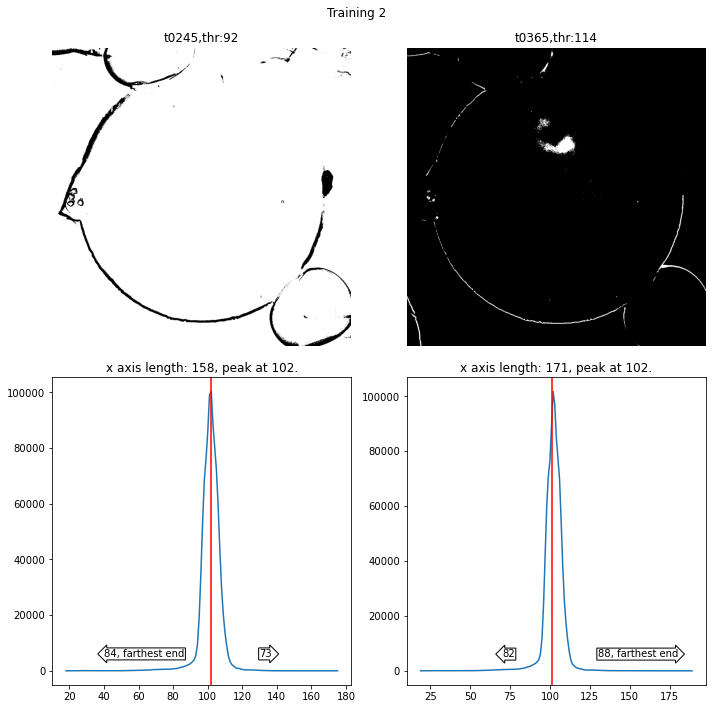

In [12]:
#Imports
import numpy as np

#Get Examples
flip = img_df2[img_df2["FileName"] == 't0245'] #Example from above
nflip = img_df2[img_df2["FileName"] == 't0365'] #Example from above
hist, hist_centers = exposure.histogram(flip.iloc[0,1])
nhist, nhist_centers = exposure.histogram(nflip.iloc[0,1])
flipbin = flip.iloc[0,1] > tri(flip.iloc[0,1])
nflipbin = nflip.iloc[0,1] > tri(nflip.iloc[0,1])

#Get the index of peak position
flipm = np.argmax(hist)
nflipm = np.argmax(nhist)

#Detailed plots
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax = ax.ravel()
fig.suptitle('Training 2')
ax[0].imshow(flipbin, cmap='gray')
ax[0].set_title(f'{flip.iloc[0,0]},thr:{tri(flip.iloc[0,1])}')
ax[0].axis('off')
ax[1].imshow(nflipbin, cmap='gray')
ax[1].set_title(f'{nflip.iloc[0,0]},thr:{tri(nflip.iloc[0,1])}')
ax[1].axis('off')
ax[2].plot(hist_centers,hist)
ax[2].axvline(x=hist_centers[flipm], color='r')
ax[2].text(40, 5000, f'{hist_centers[flipm]-min(hist_centers)}, farthest end', 
           bbox=dict(boxstyle='larrow,pad=0.1', fc='w', ec='k')) 
ax[2].text(130, 5000, f'{max(hist_centers)-hist_centers[flipm]}', 
           bbox=dict(boxstyle='rarrow,pad=0.1', fc='w', ec='k')) 
ax[2].set_title(f'x axis length: {len(hist)}, peak at {hist_centers[flipm]}.')
ax[3].plot(nhist_centers, nhist)
ax[3].text(70, 5000, f'{hist_centers[nflipm]-min(nhist_centers)}', 
           bbox=dict(boxstyle="larrow,pad=0.1", fc="w", ec="k"))
ax[3].text(130, 5000, f'{max(nhist_centers)-hist_centers[nflipm]}, farthest end', 
           bbox=dict(boxstyle='rarrow,pad=0.1', fc='w', ec='k'))
ax[3].axvline(x=hist_centers[nflipm], color='r')
ax[3].set_title(f'x axis length: {len(nhist)}, peak at {nhist_centers[nflipm]}.')
fig.tight_layout()
plt.show()

And indeed this is probably the case which makes the triangle thresholding method goes awry.

The code block below is an experiment to switch/reflip the making of the binary image according to which side the farthest end lies. However this does not work very well (commented to avoid running, uncomment to see result).

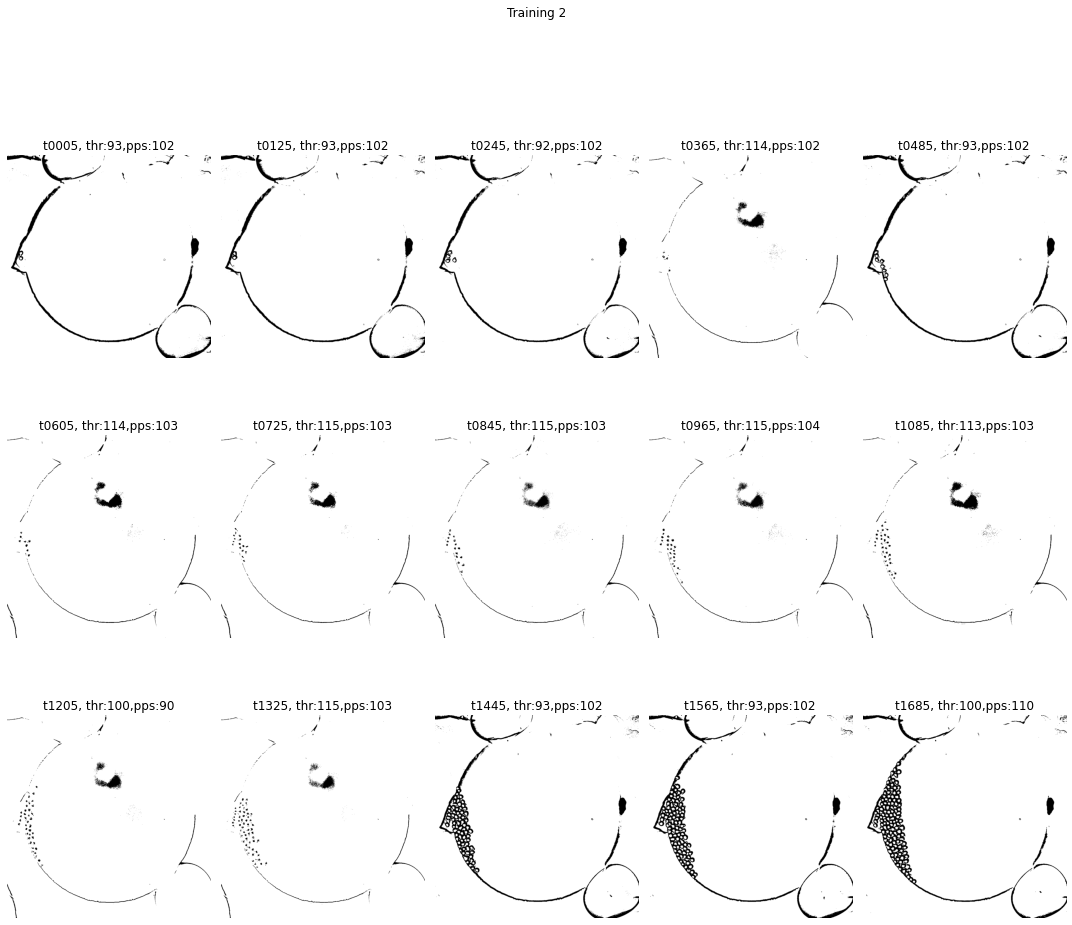

In [13]:
#Try again with if condition to switch. Does not work though

#Overview
fig, ax = plt.subplots(3,5,figsize=(15,15))
fig.suptitle('Training 2')
ax = ax.ravel()
k=0
for n in range(1,len(img_df2),24): #Just sample some images
    hist, hist_centers = exposure.histogram(img_df2.iloc[n,1])
    peak_idx = np.argmax(hist)
    thr = tri(img_df2.iloc[n,1])
    if thr < hist_centers[peak_idx] :
        binary_img = img_df2.iloc[n,1] > thr #Then normal
    else:
        binary_img = img_df2.iloc[n,1] < thr #Then switch
    title = img_df2.iloc[n,0]
    ax[k].imshow(binary_img, cmap='gray')
    ax[k].set_title(f'{title}, thr:{thr},pps:{hist_centers[peak_idx]}')
    ax[k].axis('off')
    k=k+1
    fig.tight_layout()
    
#Alternatively, larger images
#for n in range(1,len(img_df2),12):
#    hist, hist_centers = exposure.histogram(img_df2.iloc[n,1])
#    peakpos = np.argmax(hist)
#    thr = tri(img_df2.iloc[n,1])
#    if (peakpos-(len(hist)-peakpos)) > -1 :
#        binary_img = img_df2.iloc[n,1] > thr
#    else :
#        binary_img = img_df2.iloc[n,1] < thr
#    title = img_df2.iloc[n,0]
#    fig, ax = plt.subplots(figsize=(8,8))
#    plt.imshow(binary_img, cmap='gray')
#    plt.title(f'Image {title}.')
#    show()

Since I am not sure how to improve this, another approach was taken. 

Checking the value of the triangle threshold, it seems like it works best if abs(threshold-histogram peak) < ~10, just by observation. So now trying that hypothesis.

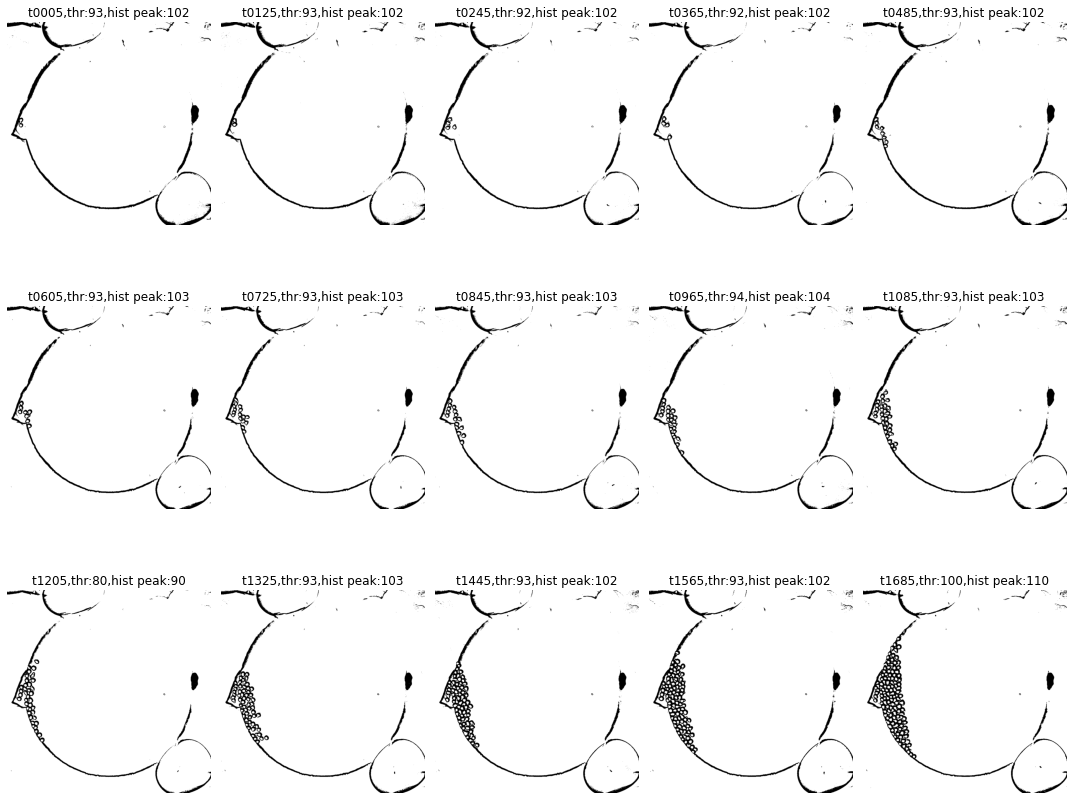

In [14]:
#Try again with manual adjustment of differences between threshold and peak position.

#Overview
fig, ax = plt.subplots(3,5,figsize=(15,15))
ax = ax.ravel()
k=0
for n in range(1,len(img_df2),24): #Just sample some images
    hist, hist_centers = exposure.histogram(img_df2.iloc[n,1])
    peak_idx = np.argmax(hist)
    thr = tri(img_df2.iloc[n,1])
    if (hist_centers[peak_idx]-thr) < 0 :
        thr = hist_centers[peak_idx] - 10 #Set thr to be peakpos - 10 (arbitrary)
        binary_img = img_df2.iloc[n,1] > thr 
    else :
        binary_img = img_df2.iloc[n,1] > thr 
    title = img_df2.iloc[n,0]
    ax[k].imshow(binary_img, cmap='gray')
    ax[k].set_title(f'{title},thr:{thr},hist peak:{hist_centers[peak_idx]}')
    ax[k].axis('off')
    k=k+1
    fig.tight_layout()

The result seems better than expected. But at this point, might as well just abandon the triangle thresholding method and try manual thresholding for all images by setting the threshold in respect/relative to the histogram peak position.

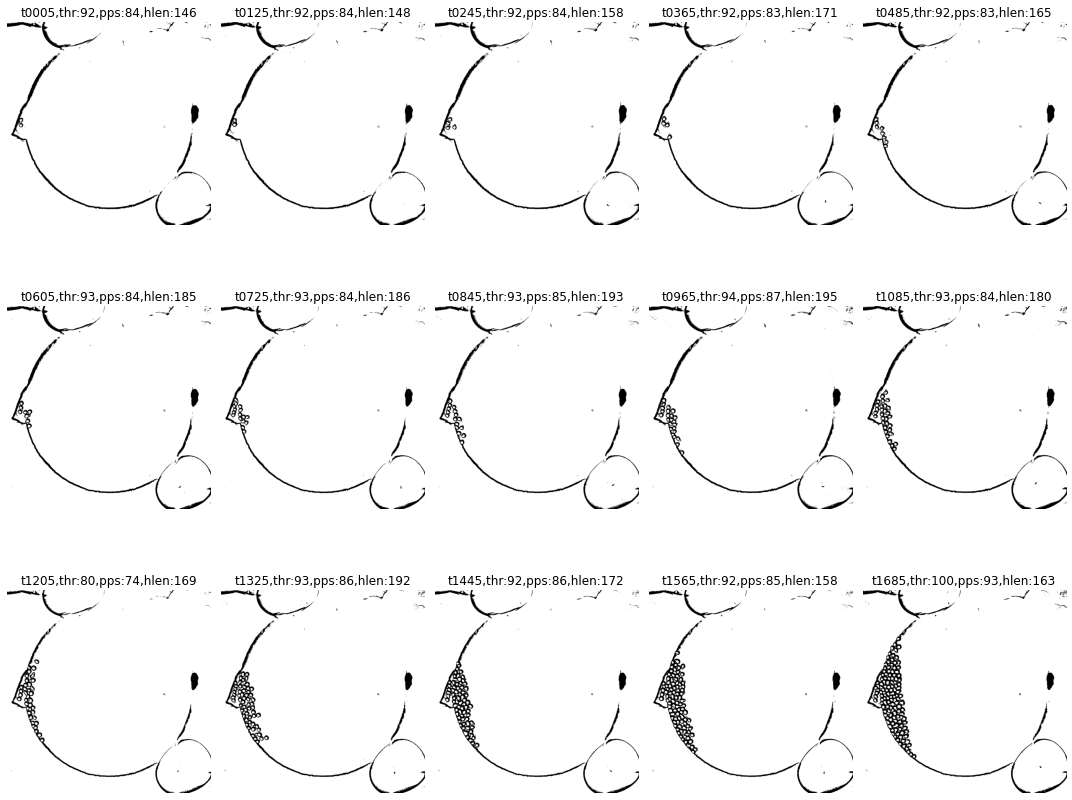

In [15]:
#Thresholding relative to histogram peak position
fig, ax = plt.subplots(3,5,figsize=(15,15))
#fig.suptitle('Training 2')
ax = ax.ravel()
k=0
for n in range(1,len(img_df2),24): #Just sample some images
    hist, hist_centers = exposure.histogram(img_df2.iloc[n,1])
    peak_idx = np.argmax(hist)
    thr = hist_centers[peak_idx] - 10 #Threshold 8 values away from peakpos but not exceeding
    binary_img = img_df2.iloc[n,1] > thr 
    title = img_df2.iloc[n,0]
    ax[k].imshow(binary_img, cmap='gray')
    ax[k].set_title(f'{title},thr:{thr},pps:{peak_idx},hlen:{len(hist)}')
    ax[k].axis('off')
    k=k+1
    fig.tight_layout()

Surprisingly, that seems to work well enough and quite similar to the result of triangle thresholding method when it does work. 

Well, there goes weeks worth of experimenting down the drain, just to go use manual thresholding in the end. Not sure if I am going to include here my experiment with Sobel and Canny edge detections. That's an entirely different wormhole.

Now proceed to check with other (sub)datasets (commented to avoid running, uncomment to see result).

In [16]:
#Now check other (sub)dataset, looks ok.
#Challenge 1.
path3 = ('./Images/challenge_BF-C2DL-HSC/01/subset/*.tif')
img_df3 = load_imgs(path3)

#fig, ax = plt.subplots(3,5,figsize=(15,15))
#fig.suptitle('Challenge 1')
#ax = ax.ravel()
#k=0
#for n in range(1,len(img_df3),24): #Just sample some images
#    hist, hist_centers = exposure.histogram(img_df3.iloc[n,1])
#    peak_idx = np.argmax(hist)
#    thr = hist_centers[peak_idx] - 10
#    binary_img = img_df3.iloc[n,1] > thr 
#    title = img_df3.iloc[n,0]
#    ax[k].imshow(binary_img, cmap='gray')
#    ax[k].set_title(f'{title},thr:{thr},pps:{peak_idx},hlen:{len(hist)}')
#    ax[k].axis('off')
#    k=k+1
#    fig.tight_layout()

In [17]:
#Challenge 2, another one, also looks ok.
path4 = ('./Images/challenge_BF-C2DL-HSC/02/subset/*.tif')
img_df4 = load_imgs(path4)

#fig, ax = plt.subplots(3,5,figsize=(15,15))
#fig.suptitle('Challenge 2')
#ax = ax.ravel()
#k=0
#for n in range(1,len(img_df4),24): #Just sample some images
#    hist, hist_centers = exposure.histogram(img_df4.iloc[n,1])
#    peak_idx = np.argmax(hist)
#    thr = hist_centers[peak_idx] - 10
#    binary_img = img_df4.iloc[n,1] > thr 
#    title = img_df4.iloc[n,0]
#    ax[k].imshow(binary_img, cmap='gray')
#    ax[k].set_title(f'{title},thr:{thr},pps:{peak_idx},hlen:{len(hist)}')
#    ax[k].axis('off')
#    k=k+1
#    fig.tight_layout()

In [18]:
#Make thresholding function
def thresh(image_arr):
    hist, hist_centers = exposure.histogram(image_arr)
    peakpos = np.argmax(hist)
    thr = peakpos + 8
    binary_img = image_arr > thr 
    return(binary_img)

Apply threshold and put the result in a new column in the parent dataframe.

In [19]:
#Put binary image in the dataframe in a new column
img_df['Binary']= ''
for n in range(0,len(img_df),1):
    image_arr = img_df.iloc[n,1]
    binary_img = thresh(image_arr) 
    img_df.iloc[n,2] = np.array([binary_img])
#Check
img_df.iloc[0:4]
#print(type(img_df.iloc[0,3]))
#print(img_df.iloc[0,3])

,FileName,Image,Binary
0,t0001,"[[132, 132, 131, 133, 132, 131, 133, 134, 132,...","[[[True, True, True, True, True, True, True, T..."
1,t0040,"[[132, 132, 132, 132, 131, 133, 132, 134, 133,...","[[[True, True, True, True, True, True, True, T..."
2,t0080,"[[132, 132, 131, 132, 132, 130, 131, 133, 133,...","[[[True, True, True, True, True, True, True, T..."
3,t0100,"[[131, 133, 133, 131, 132, 131, 131, 131, 132,...","[[[True, True, True, True, True, True, True, T..."


#### 2.3. Masking

It seems though now it may be neccessary to mask the outer part of the well to exclude potential problems.

To this end, a mask is made for the well in each dataset. All the wells looks well rounded and only ever so slightly off-center. So a simple circle masking could probably work for all dataset except for the Training 2 dataset. Nevertheless, a bespoke masking option might as well be available for other datasets.

(In the end this seemed like a good idea to exclude unnecessary parts as much as possible)

In [20]:
#Imports
from skimage import draw

# Masking function
def mask_set(image_arr,set=''):
    image_arr_copy = np.squeeze(image_arr) #not sure why squeeze is necessary
    if len(image_arr.shape)>2:
        mask = np.ones(shape=image_arr.shape[1:3],dtype="bool")
    else:
        mask = np.ones(shape=image_arr.shape,dtype="bool")
    if set == 'tr1': #for training 1 dataset
        #rr, cc = draw.rectangle(start=(250, 400), extent=(300, 200))
        #mask[rr, cc] = True
        rr, cc = draw.disk((514, 458), 401) #((y,x),rad)
        mask[rr, cc] = False
    elif set == 'tr2': #for training 2 dataset
        #rr, cc = draw.polygon((560,328,766),(25,117,178))
        rr, cc = draw.ellipse(455,175,80,170,rotation=np.deg2rad(45)) #better than polygon
        mask[rr, cc] = False
        rr1, cc1 = draw.disk((512, 488), 405)
        mask[rr1,cc1] =False
    elif set == 'ch1': #for challenge 1 dataset
        rr, cc = draw.disk((520, 505), 450)
        mask[rr, cc] = False
    elif set == 'ch2': #for challenge 2 dataset
        rr, cc = draw.disk((515, 515), 451)
        mask[rr, cc] = False
    else:
        print('Specify set (tr1, tr2, ch1, or ch2).')
    image_arr_copy[mask] = 1
    return image_arr_copy
    #return(mask)

Apply masking and put the result in a new column in the parent dataframe.

In [21]:
#Put masked image in the parent dataframe
img_df['Masked']=''
for n in range(0,len(img_df),1):
    masked = mask_set(img_df.iloc[n,2],set='tr1')
    img_df.iloc[n,3] = np.array([masked])

In [22]:
#for n in range (0,len(img_df['Masked']),9):
#    fig, ax = plt.subplots(figsize=(8,8))
#    ax.imshow(np.squeeze(img_df.iloc[n,3]),cmap='gray')

In [23]:
#Check dataframe
img_df.iloc[0:4]

,FileName,Image,Binary,Masked
0,t0001,"[[132, 132, 131, 133, 132, 131, 133, 134, 132,...","[[[True, True, True, True, True, True, True, T...","[[[True, True, True, True, True, True, True, T..."
1,t0040,"[[132, 132, 132, 132, 131, 133, 132, 134, 133,...","[[[True, True, True, True, True, True, True, T...","[[[True, True, True, True, True, True, True, T..."
2,t0080,"[[132, 132, 131, 132, 132, 130, 131, 133, 133,...","[[[True, True, True, True, True, True, True, T...","[[[True, True, True, True, True, True, True, T..."
3,t0100,"[[131, 133, 133, 131, 132, 131, 131, 131, 132,...","[[[True, True, True, True, True, True, True, T...","[[[True, True, True, True, True, True, True, T..."


#### 2.4. Comparing with Edge detection (and local thresholding)

However the result of thresholding leaves line(s) of the well that is difficult to remove which may interfere, no matter how much I played with the masking. Trying canny as comparison. And while I'm at it, since I forgot about testing local thresholding, so here comparing with it too.

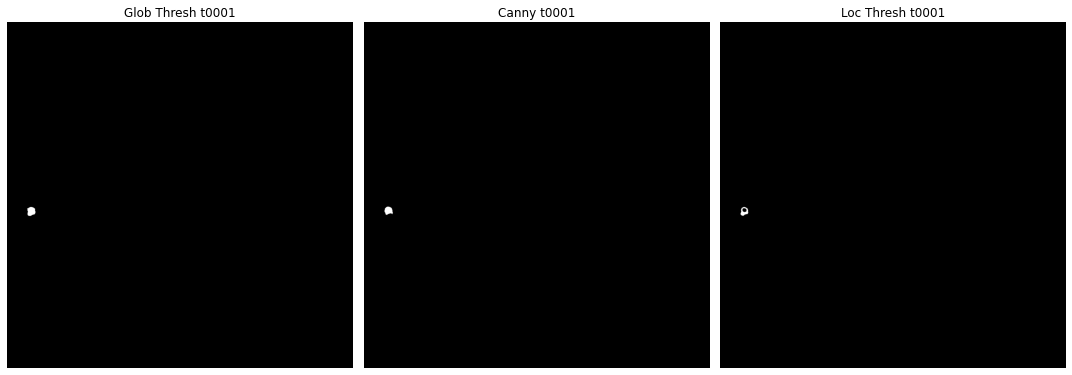

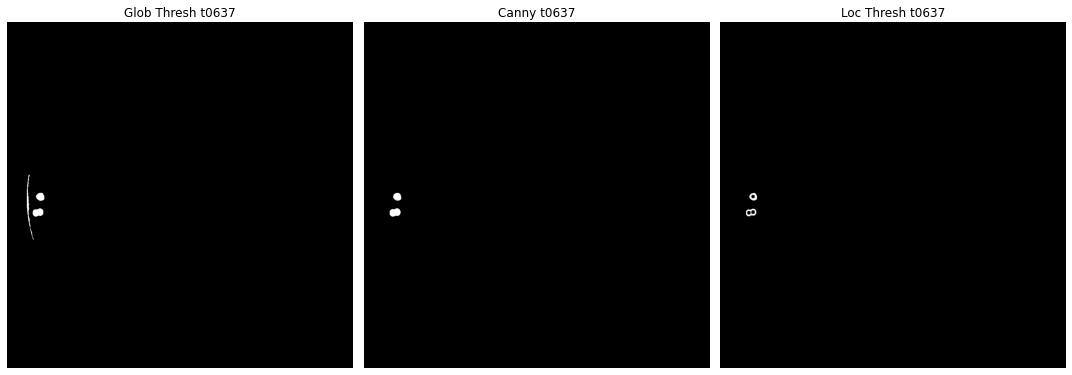

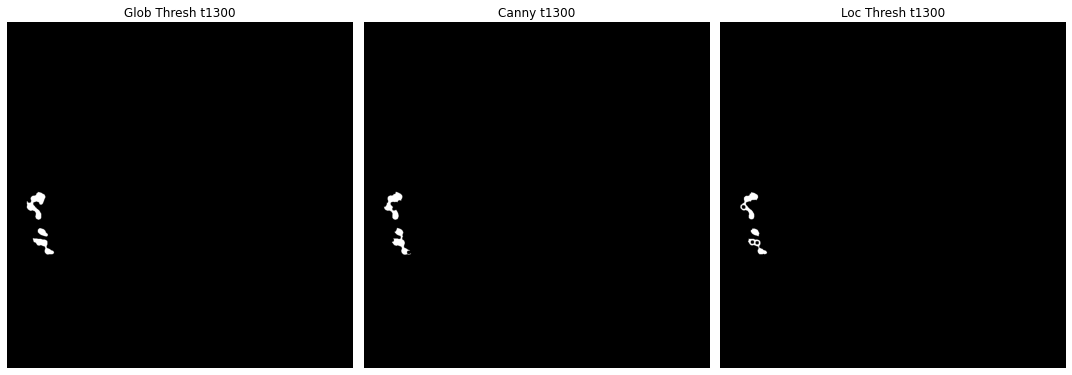

In [24]:
#Imports
from skimage import util
from skimage.morphology import remove_small_objects
import scipy.ndimage as ndi
from skimage.feature import canny
from skimage.morphology import binary_dilation,binary_erosion, disk, square

from skimage.filters import threshold_local 
block_size = 35

#Closing operation but with different structuring element
d_struct = disk(5)
e_struct = disk(5)

comparison = img_df #Change (sub)dataset as needed
sset='tr1' 
for n in range(0,len(comparison),10): #Change this as well according to dataset
    
    #global threshold
    binary_img = comparison.iloc[n,2] #Binary image column
    tmasked = mask_set(binary_img,set=sset) #Change set accordingly 
    tinv = util.invert(tmasked) #Invert values so bg is 0
    tcleaned = remove_small_objects(tinv) #Cleaning
    tdilated = binary_dilation(tcleaned,d_struct)
    teroded = binary_erosion(tdilated,e_struct)
    #filledt = ndi.morphology.binary_fill_holes(tinv)
    
    #canny
    edge = canny(comparison.iloc[n,1],sigma=2) 
    cinv = util.invert(edge) #Invert to fit with mask
    cmasked = mask_set(cinv,set=sset) 
    cinv2 = util.invert(cmasked) #Invert again to get bg as black
    cdilated = binary_dilation(cinv2,d_struct)
    ceroded = binary_erosion(cdilated,e_struct)
    #filledc = ndi.morphology.binary_fill_holes(cinv2)
    
    #local threshold
    image = comparison.iloc[n,1]
    loc_t= threshold_local(image, block_size, offset=10)
    lbin = image > loc_t
    lmasked = mask_set(lbin,set=sset)
    linv = util.invert(lmasked) #Invert values so bg is 0
    lcleaned = remove_small_objects(linv) #Cleaning
    ldilated = binary_dilation(lcleaned,d_struct)
    leroded = binary_erosion(ldilated,e_struct)
    #filledl = ndi.morphology.binary_fill_holes(cinv2)
    
    #plot
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(teroded,cmap='gray')
    ax[0].set_title(f'Glob Thresh {comparison.iloc[n,0]}')
    ax[1].imshow(ceroded,cmap='gray')
    ax[1].set_title(f'Canny {comparison.iloc[n,0]}')
    ax[2].imshow(leroded,cmap='gray')
    ax[2].set_title(f'Loc Thresh {comparison.iloc[n,0]}')
    [ax.set_axis_off() for ax in ax.ravel()]
    fig.tight_layout()
    show()

In fact, at least for this subset, either using canny edge detection or thresholding does not give much difference. Even the unmasked well outline can be removed depending on the size of dilation-erosion process (closing), though I can't be sure of how optimal this can be made.

However along the experiment, trying other subsets, it seems evident that the global thresholding does not perform well for other subsets, the local thresholding as well (e.g.: img_df3, ch1 subset).

In [25]:
##Just like above but with img_df3
#Imports
#from skimage import util
#from skimage.morphology import remove_small_objects
#import scipy.ndimage as ndi
#from skimage.feature import canny
#from skimage.morphology import binary_dilation,binary_erosion, disk, square

#from skimage.filters import threshold_local 
#block_size = 35

#Closing operation but with different structuring element
#d_struct = disk(5)
#e_struct = disk(5)

#comparison = img_df3 #Change (sub)dataset as needed
#sset='ch1' 
#for n in range(0,len(comparison),10): #Change this as well according to dataset
    
#    #global threshold
#    binary_img = comparison.iloc[n,2] #Binary image column
#    tmasked = mask_set(binary_img,set=sset) #Change set accordingly 
#    tinv = util.invert(tmasked) #Invert values so bg is 0
#    tcleaned = remove_small_objects(tinv) #Cleaning
#    tdilated = binary_dilation(tcleaned,d_struct)
#    teroded = binary_erosion(tdilated,e_struct)
#    #filledt = ndi.morphology.binary_fill_holes(tinv)
    
#    #canny
#    edge = canny(comparison.iloc[n,1],sigma=2) 
#    cinv = util.invert(edge) #Invert to fit with mask
#    cmasked = mask_set(cinv,set=sset) 
#    cinv2 = util.invert(cmasked) #Invert again to get bg as black
#    cdilated = binary_dilation(cinv2,d_struct)
#    ceroded = binary_erosion(cdilated,e_struct)
#    #filledc = ndi.morphology.binary_fill_holes(cinv2)
    
#    #local threshold
#    image = comparison.iloc[n,1]
#    loc_t= threshold_local(image, block_size, offset=10)
#    lbin = image > loc_t
#    lmasked = mask_set(lbin,set=sset)
#    linv = util.invert(lmasked) #Invert values so bg is 0
#    lcleaned = remove_small_objects(linv) #Cleaning
#    ldilated = binary_dilation(lcleaned,d_struct)
#    leroded = binary_erosion(ldilated,e_struct)
#    #filledl = ndi.morphology.binary_fill_holes(cinv2)
    
#    #plot
#    fig, ax = plt.subplots(1,3,figsize=(15,15))
#    ax[0].imshow(teroded,cmap='gray')
#    ax[0].set_title(f'Glob Thresh {comparison.iloc[n,0]}')
#    ax[1].imshow(ceroded,cmap='gray')
#    ax[1].set_title(f'Canny {comparison.iloc[n,0]}')
#    ax[2].imshow(leroded,cmap='gray')
#    ax[2].set_title(f'Loc Thresh {comparison.iloc[n,0]}')
#    [ax.set_axis_off() for ax in ax.ravel()]
#    fig.tight_layout()
#    show()

#### 2.5. Watershed

Going forward with canny edge detection, watershedding with cv2 following the [tutorial](https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html).

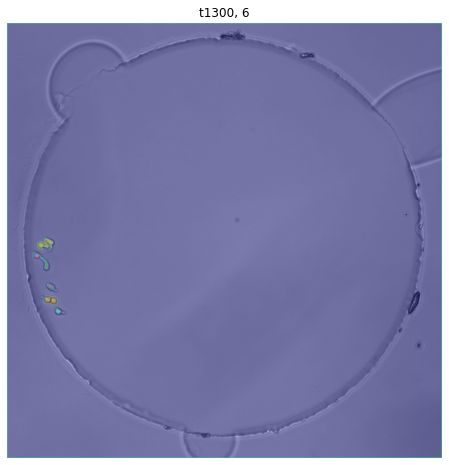

In [26]:
#Imports
import cv2

img_test = img_df.iloc[20]
val=0.7 #For scaling the distance

#Find definite background by dilating the cells 
edge = canny(img_test[1],sigma=2) 
cinv = util.invert(edge) #Invert to fit with mask
cmasked = mask_set(cinv,set='tr1') 
cinv2 = util.invert(cmasked) #Invert again to get bg as black
cdilated = binary_dilation(cinv2,disk(5))
def_bg = np.uint8(cdilated.astype(int)*255) #Convert from boolean to int8
#####plt.imshow(def_bg) #Black is definitely background

#Find definite cell centers
#Calculates the distance to the closest zero pixel for each pixel of the source image. 
dist_transform = cv2.distanceTransform(def_bg,cv2.DIST_L2,5) #DIST_L2 is euclidian distance
#plt.imshow(dist_transform, cmap='gray') #Dist transformed img. 
#print(dist_transform.max()) #This is the max distance
ret2, def_cen = cv2.threshold(dist_transform,val*dist_transform.max(),255,0) #threshold dist by val*max 
#####plt.imshow(def_cen, cmap='gray')

#Ambiguous region is bg substracted by centers
def_cen = np.uint8(def_cen)  #Convert from float to int8
unknown = cv2.subtract(def_bg,def_cen)
#####plt.imshow(unknown, cmap='gray')

#Create a marker and label the regions inside. 
#Both foreground and background will be labeled with positive, unknown will be labeled 0. 
#Use ConnectedComponents for markers
ret3, markers = cv2.connectedComponents(def_cen)
numb=markers.max()
#####plt.imshow(markers,cmap='jet')

#Add a number to all labels so that definite background is not 0
markers = markers+10

#Mark the region of unknown with zero
markers[unknown==255] = 0
#####plt.imshow(markers, cmap='jet') #Look at the 3 distinct regions.

#Watershed filling. 
ori_img = cv2.cvtColor(img_test[1], cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(ori_img,markers)

#Color boundaries in yellow. 
#Remember that watershed assigns boundaries a value of -1
ori_img[markers == -1] = [0,255,255]  

#label2rgb - Return an RGB image where color-coded labels are painted over the image.
from skimage import measure, color, io
labeled = color.label2rgb(markers, bg_label=0)
#####plt.imshow(img2)

#plot
#fig, ax = plt.subplots(2,3,figsize=(15,15))
#ax = ax.ravel()
#ax[0].imshow(def_bg,cmap='gray')
#ax[0].set_title(f'Def BG {img_test[0]}')
#ax[1].imshow(def_cen,cmap='gray')
#ax[1].set_title(f'Def FG')
#ax[2].imshow(unknown,cmap='gray')
#ax[2].set_title(f'Unknown')
#ax[3].imshow(markers,cmap='gist_rainbow')
#ax[3].set_title(f'Markers')
#ax[4].imshow(img2,cmap='gist_rainbow')
#ax[4].set_title(f'Labeled')
#ax[5].imshow(ori_img,cmap='gray')
#ax[5].imshow(img_test,alpha=0.2)
#ax[5].set_title(f'Ori Img')
#fig.tight_layout()
#[ax.set_axis_off() for ax in ax.ravel()]
#show()

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(ori_img,cmap='gray')
ax.imshow(labeled,alpha=0.2,cmap='viridis')
ax.set_title(f'{img_test[0]}, {numb}')
ax.set_axis_off()

Trying with skimage as well ([tutorial](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html?highlight=watershed)). 

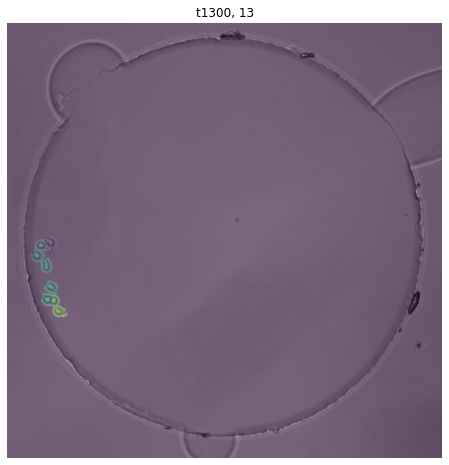

In [27]:
#Imports
import scipy.ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import measure

img_test = img_df.iloc[20]
cstruct = disk(3)
s = [[1,1,1],
     [1,1,1],
     [1,1,1]]

edge = canny(img_test[1],sigma=2) 
cinv = util.invert(edge) #Invert to fit with mask
cmasked = mask_set(cinv,set='tr1') 
cinv2 = util.invert(cmasked) #Invert again to get bg as black
cdilated = binary_dilation(cinv2,disk(4))
#filled = ndi.morphology.binary_fill_holes(cinv2)

distance = ndi.distance_transform_edt(cdilated) #Exact euclidean distance transform
coords = peak_local_max(distance, footprint=cstruct, labels=cdilated) #Find peaks in an image
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, c_count = ndi.label(mask,structure=s)
labeled = watershed(-distance, markers, mask=cdilated, compactness=0)
#c_countl = measure.label(labeled)

#plot
#fig, ax = plt.subplots(1,3,figsize=(15,15))
#ax = ax.ravel()
#ax[0].imshow(cdilated,cmap='gray')
#ax[0].set_title(f'Input {img_test[0]}')
#ax[1].imshow(labeled,cmap='gist_rainbow',alpha=0.3)
#ax[1].set_title(f'Labeled {c_count}')
#ax[2].imshow(img_test, cmap='gray')
#ax[2].set_title(f'Ori {img_test[0]}')
#[ax.set_axis_off() for ax in ax.ravel()]
#fig.tight_layout()
#show()

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(img_test[1],cmap='gray')
ax.imshow(labeled,cmap='viridis',alpha=0.3)
ax.set_title(f'{img_test[0]}, {c_count}')
ax.set_axis_off()

After playing around with both of the libraries, it seems to me that skimage is easier to use. Though the experiment with cv2 provides a clear(er) explanation and understanding of how watershedding actually works. 

### Summing up

At this point I can see that this method/workflow probably would not be the most effective in tackling the challenge posed by the image series. 

The triangle thresholding method although seem to work well for one set, it does not seem so for other sets. Against my initial intuition, (global) manual thresholding the images works better than automatically using the methods included in skimage. However, the comparison of (global) manual thresholding, local thresholding, and edge detection shows that edge detection seems to give better resulting image. 

Edge detection was finally chosen to deal with the difficulty encountered using thresholding and the subsequent masking step (which still left some lines of the well). The masking step is however still applied for the edge detection method because the mask was anyway already made, this is in hope that it would help the workflow work better.

The watershedding afterwards was done using the skimage library. Admittedly many optimizations could/should be done more on this step or even before such as; optimization in dilating/eroding the binary input image, optimizing the size/shape of the filter to define cell centers. However fine tuning these parameters is very very demanding and even if it works for the subsets, there is difficulty in monitoring how it performs on each image of the complete dataset. And this applies as well to the previous steps (edge detecting & masking result).

## 3. Run on subsets

The above method of processing the images are then assembled on a python script (cell_count.py) according to the explanation above without any further minute optimization for the purpose to be run on the complete dataset. The following is the result of a test run of the script on the subsets.

[None, None, None, None]

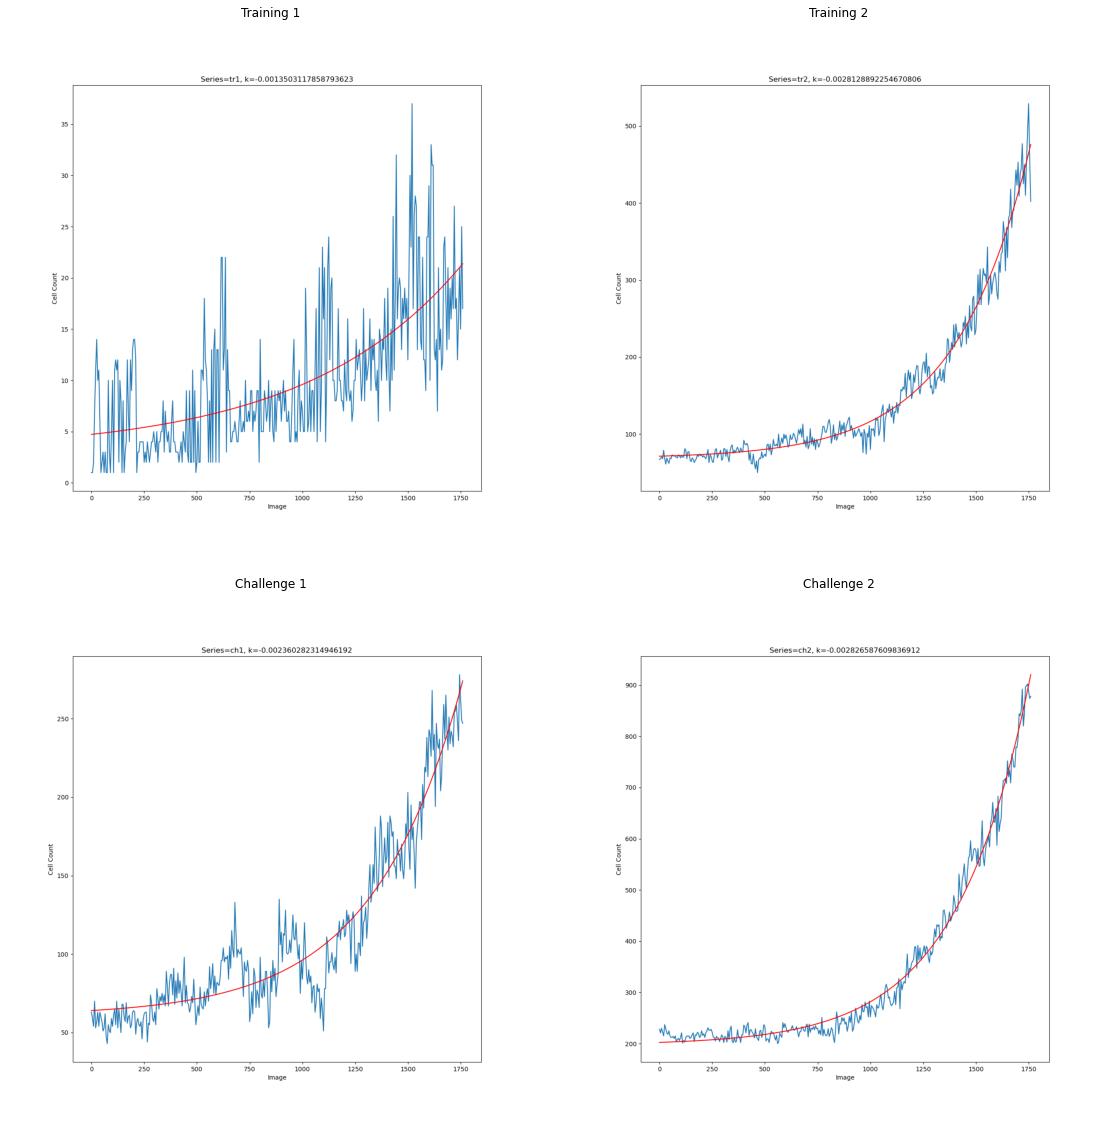

In [28]:
tr1_plot = imread('./Images/training_BF-C2DL-HSC/01/subset/tr1_count.png')
tr2_plot = imread('./Images/training_BF-C2DL-HSC/02/subset/tr2_count.png')
ch1_plot = imread('./Images/challenge_BF-C2DL-HSC/01/subset/ch1_count.png')
ch2_plot = imread('./Images/challenge_BF-C2DL-HSC/02/subset/ch2_count.png')

fig, ax = plt.subplots(2,2,figsize=(16,16))
ax = ax.ravel()
ax[0].imshow(tr1_plot)
ax[0].set_title('Training 1')
ax[1].imshow(tr2_plot)
ax[1].set_title('Training 2')
ax[2].imshow(ch1_plot)
ax[2].set_title('Challenge 1')
ax[3].imshow(ch2_plot)
ax[3].set_title('Challenge 2')
fig.tight_layout()
[ax.set_axis_off() for ax in ax.ravel()]

The red curve on each of the cell count plots is a fitting of an exponential growth formula $y=A^{(k.x)}+C$. From this fitting the growth constant k can be obtained for each sets. 

Arguably this could be the reason why the cell count can be seen to be fluctuating, very strongly for the case of training 1 set where the final cell count (in comparison to other set) is rather low. This fluctuation also occurs for other sets as well. And the final cell count of ~900 for challenge 2 set seem to be somehow questionable.

As can be seen, this workflow does not seem to be very robust. Cell counting seems to be very very challenging to do optimally for so many images using this method. I can imagine that probably machine learning method(s) could probably offer a better workflow for these cases, both in respect of ease of setting up and also in getting a better final result. But I am not sure how challenging it would be in terms of preprocessing the images until they are ready for the process itself.

To verify the result of the growth by cell counting, an exponential growth is also estimated by calculating the area. This method is pretty much straight forward and done by summing up the pixels of the image after binarizing it [[3](http://www.rpgroup.caltech.edu/ncbs_pboc/code/t1b_ecoli_growth.html)]. This is very similar to what has been done on the growth of leaves and should be more robust than the cell counting method in this workflow.

## 4. Run on complete dataset

Running the python script on the complete dataset in the genetik server, the following plots are obtained. The plots are shown side-by-side between the result of cell counting and area calculation, along with the fitting.

Worthy of note, the verification of the result using area calculation also suffers from the same predicament as the estimation using cell counting in terms of image pre-processing as the treatment of the images are the same (dilation-erosion). However since all image are treated this way, this should not matter in the end.

[None, None, None, None]

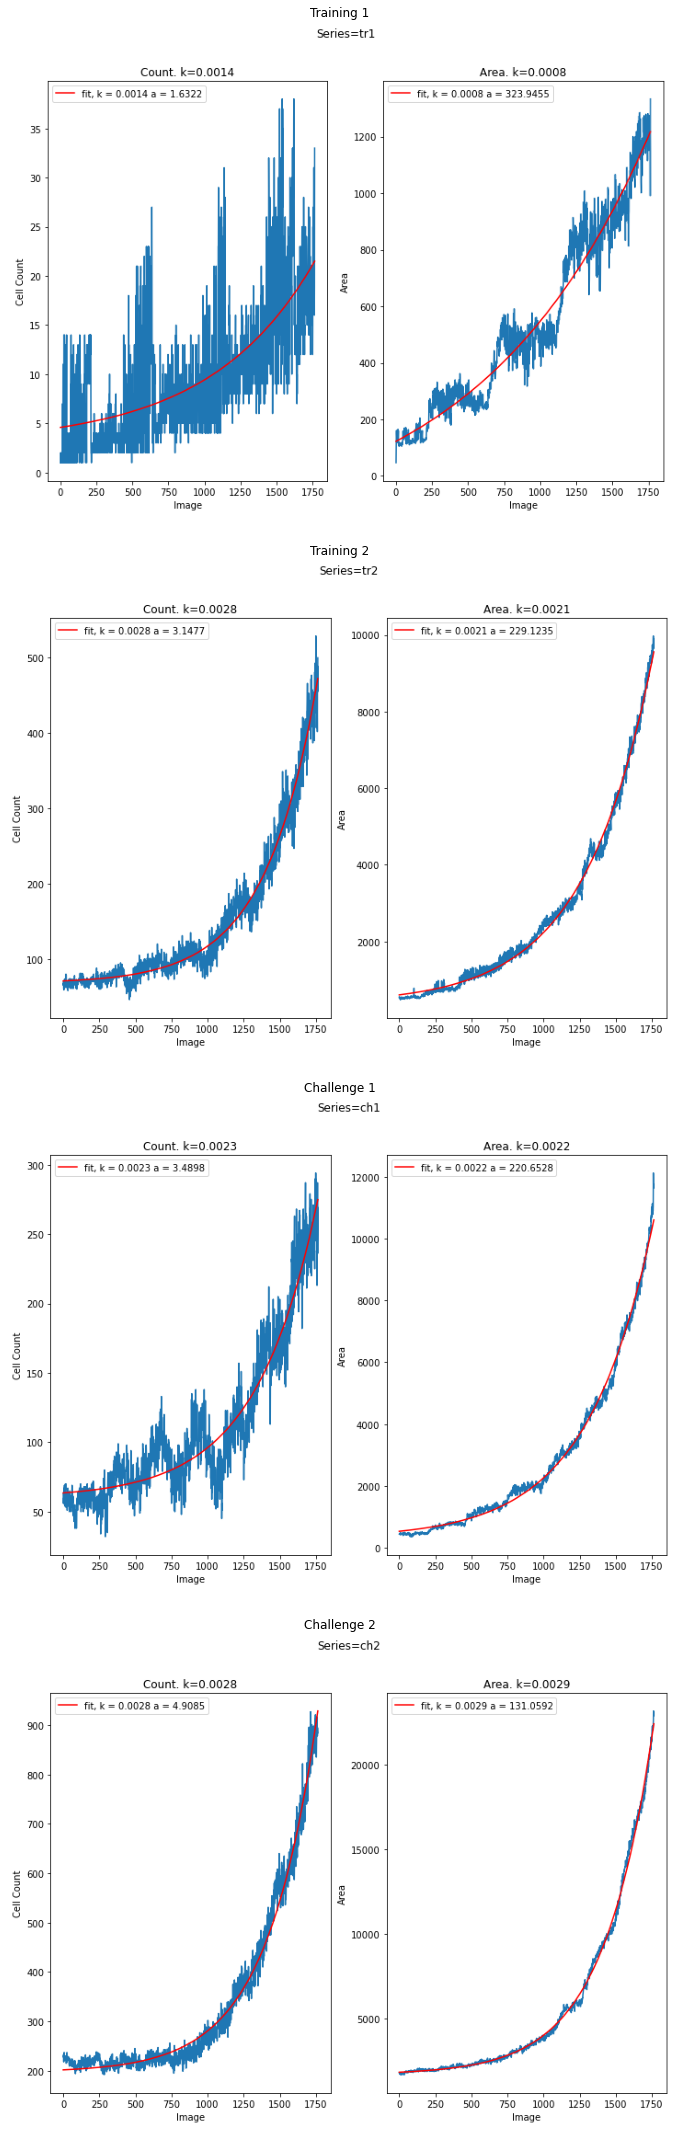

In [29]:
tr1_plot = imread('./FromServer/tr1.png')
tr2_plot = imread('./FromServer/tr2.png')
ch1_plot = imread('./FromServer/ch1.png')
ch2_plot = imread('./FromServer/ch2.png')

fig, ax = plt.subplots(4,1,figsize=(30,30))
ax = ax.ravel()
ax[0].imshow(tr1_plot)
ax[0].set_title('Training 1')
ax[1].imshow(tr2_plot)
ax[1].set_title('Training 2')
ax[2].imshow(ch1_plot)
ax[2].set_title('Challenge 1')
ax[3].imshow(ch2_plot)
ax[3].set_title('Challenge 2')
fig.tight_layout()
[ax.set_axis_off() for ax in ax.ravel()]


The result is summarized in a dataframe below. The doubling time is calculated by $t=\frac{ln 2}{k}$.

In [30]:
data = {'Series':  ['tr1','tr1','tr2','tr2','ch1','ch1','ch2','ch2'],
        'Method': ['count','area','count','area','count','area','count','area'],
        'Growth_Constant': [0.0014,0.0008,0.0028,0.0021,0.0023,0.0022,0.0028,0.0029],
        'Doubling_Time': [495.1051, 866.434, 247.5526, 330.0701, 301.3683, 315.0669, 247.5526, 239.0163],
        }

df = pd.DataFrame(data)

#Since every image is taken at 5 minute interval
df['Doubling_Time'] = df['Doubling_Time']*5

print (df)

  Series Method  Growth_Constant  Doubling_Time
0    tr1  count           0.0014      2475.5255
1    tr1   area           0.0008      4332.1700
2    tr2  count           0.0028      1237.7630
3    tr2   area           0.0021      1650.3505
4    ch1  count           0.0023      1506.8415
5    ch1   area           0.0022      1575.3345
6    ch2  count           0.0028      1237.7630
7    ch2   area           0.0029      1195.0815
